In [404]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [405]:
df = pd.read_csv(r"C:\Users\Maftuna\Desktop\ecommerce_customer_data_custom_ratios.csv")

In [406]:
df.head(5)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [408]:
df.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47596
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [409]:
df['Returns'] = df['Returns'].fillna(0)

In [410]:
df.isnull().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

In [411]:
unique_values = df.nunique()
unique_values

Customer ID               49673
Purchase Date            249736
Product Category              4
Product Price               491
Quantity                      5
Total Purchase Amount      5247
Payment Method                4
Customer Age                 53
Returns                       2
Customer Name             39920
Age                          53
Gender                        2
Churn                         2
dtype: int64

### Feature Engineering

In [412]:
df.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')

In [413]:
df.drop(['Customer ID', 'Customer Name'], axis=1, inplace=True)


### Encoding

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Purchase Date          250000 non-null  object 
 1   Product Category       250000 non-null  object 
 2   Product Price          250000 non-null  int64  
 3   Quantity               250000 non-null  int64  
 4   Total Purchase Amount  250000 non-null  int64  
 5   Payment Method         250000 non-null  object 
 6   Customer Age           250000 non-null  int64  
 7   Returns                250000 non-null  float64
 8   Age                    250000 non-null  int64  
 9   Gender                 250000 non-null  object 
 10  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 21.0+ MB


In [415]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Year'] = df['Purchase Date'].dt.year
df['Month'] = df['Purchase Date'].dt.month
df['Day'] = df['Purchase Date'].dt.day
df['Day of Week'] = df['Purchase Date'].dt.dayofweek
df.drop('Purchase Date', axis=1, inplace=True)

In [416]:
# Kategorik ustunlar
categorical_columns = ['Product Category', 'Payment Method', 'Gender']

# Har bir ustundagi unique qiymatlarni ko'rsatish
for column in categorical_columns:
    print(f"{column} dagi qiymatlar:", df[column].unique())


Product Category dagi qiymatlar: ['Electronics' 'Home' 'Clothing' 'Books']
Payment Method dagi qiymatlar: ['Credit Card' 'PayPal' 'Cash' 'Crypto']
Gender dagi qiymatlar: ['Male' 'Female']


In [417]:
for column in categorical_columns:
    print(f"\n{column} qiymatlari va sonlari:\n{df[column].value_counts()}")



Product Category qiymatlari va sonlari:
Product Category
Clothing       75052
Books          74912
Electronics    50185
Home           49851
Name: count, dtype: int64

Payment Method qiymatlari va sonlari:
Payment Method
Credit Card    100486
PayPal          74837
Cash            49894
Crypto          24783
Name: count, dtype: int64

Gender qiymatlari va sonlari:
Gender
Female    125560
Male      124440
Name: count, dtype: int64


In [418]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['Product Category', 'Payment Method', 'Gender']

encoder = OneHotEncoder(drop = 'first')
encoded = encoder.fit_transform(df[categorical_columns]).toarray()

In [419]:
# Encoding qilingan ustunlardan DataFrame yaratamiz
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_columns))

In [420]:
# Original ustunlarni olib tashlab, encoding qilinganlarini qo'shamiz
df_encoded = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

In [421]:
df.head(5)

,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Age,Gender,Churn,Year,Month,Day,Day of Week
0,Electronics,12,3,740,Credit Card,37,0.0,37,Male,0,2020,9,8,1
1,Home,468,4,2739,PayPal,37,0.0,37,Male,0,2022,3,5,5
2,Home,288,2,3196,PayPal,37,0.0,37,Male,0,2022,5,23,0
3,Clothing,196,1,3509,PayPal,37,0.0,37,Male,0,2020,11,12,3
4,Home,449,1,3452,Credit Card,49,0.0,49,Female,1,2020,11,27,4


In [422]:
df_encoded.head(5)

,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn,Year,Month,Day,Day of Week,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Payment Method_Credit Card,Payment Method_Crypto,Payment Method_PayPal,Gender_Male
0,12,3,740,37,0.0,37,0,2020,9,8,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,468,4,2739,37,0.0,37,0,2022,3,5,5,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,288,2,3196,37,0.0,37,0,2022,5,23,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,196,1,3509,37,0.0,37,0,2020,11,12,3,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,449,1,3452,49,0.0,49,1,2020,11,27,4,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [423]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Product Price                 250000 non-null  int64  
 1   Quantity                      250000 non-null  int64  
 2   Total Purchase Amount         250000 non-null  int64  
 3   Customer Age                  250000 non-null  int64  
 4   Returns                       250000 non-null  float64
 5   Age                           250000 non-null  int64  
 6   Churn                         250000 non-null  int64  
 7   Year                          250000 non-null  int32  
 8   Month                         250000 non-null  int32  
 9   Day                           250000 non-null  int32  
 10  Day of Week                   250000 non-null  int32  
 11  Product Category_Clothing     250000 non-null  float64
 12  Product Category_Electronics  250000 non-nul

### Creating Feature

In [424]:
df_encoded['Average_Price'] = df_encoded['Total Purchase Amount'] / df_encoded['Quantity']


In [425]:
df_encoded['Returned_Purchase_Amount'] = df_encoded['Total Purchase Amount'] * df_encoded['Returns']


In [426]:
df_encoded['Weekend'] = df_encoded['Day of Week'].apply(lambda x: 1 if x in [5,6] else 0)


In [427]:
df_encoded['Recent_Purchase'] = df_encoded['Year'].apply(lambda x: 1 if x>=2022 else 0)


In [428]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Product Price                 250000 non-null  int64  
 1   Quantity                      250000 non-null  int64  
 2   Total Purchase Amount         250000 non-null  int64  
 3   Customer Age                  250000 non-null  int64  
 4   Returns                       250000 non-null  float64
 5   Age                           250000 non-null  int64  
 6   Churn                         250000 non-null  int64  
 7   Year                          250000 non-null  int32  
 8   Month                         250000 non-null  int32  
 9   Day                           250000 non-null  int32  
 10  Day of Week                   250000 non-null  int32  
 11  Product Category_Clothing     250000 non-null  float64
 12  Product Category_Electronics  250000 non-nul

In [429]:
df_encoded.head(5)

,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn,Year,Month,Day,...,Product Category_Electronics,Product Category_Home,Payment Method_Credit Card,Payment Method_Crypto,Payment Method_PayPal,Gender_Male,Average_Price,Returned_Purchase_Amount,Weekend,Recent_Purchase
0,12,3,740,37,0.0,37,0,2020,9,8,...,1.0,0.0,1.0,0.0,0.0,1.0,246.666667,0.0,0,0
1,468,4,2739,37,0.0,37,0,2022,3,5,...,0.0,1.0,0.0,0.0,1.0,1.0,684.750000,0.0,1,1
2,288,2,3196,37,0.0,37,0,2022,5,23,...,0.0,1.0,0.0,0.0,1.0,1.0,1598.000000,0.0,0,1
3,196,1,3509,37,0.0,37,0,2020,11,12,...,0.0,0.0,0.0,0.0,1.0,1.0,3509.000000,0.0,0,0
4,449,1,3452,49,0.0,49,1,2020,11,27,...,0.0,1.0,1.0,0.0,0.0,0.0,3452.000000,0.0,0,0


### Scaling

In [430]:
from sklearn.preprocessing import StandardScaler

In [431]:
scaler = StandardScaler()


In [432]:
scale_columns = ['Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age', 'Returns', 'Age',  'Year', 'Month', 'Day', 'Day of Week', 'Average_Price', 'Returned_Purchase_Amount']

In [433]:
df_encoded[scale_columns] = scaler.fit_transform(df_encoded[scale_columns])

In [434]:
df_encoded.head(5)

,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn,Year,Month,Day,...,Product Category_Electronics,Product Category_Home,Payment Method_Credit Card,Payment Method_Crypto,Payment Method_PayPal,Gender_Male,Average_Price,Returned_Purchase_Amount,Weekend,Recent_Purchase
0,-1.714081,0.000780,-1.375929,-0.452145,-0.821739,-0.452145,0,-1.278899,0.838950,-0.868165,...,1.0,0.0,1.0,0.0,0.0,1.0,-0.897081,-0.678182,0,0
1,1.506979,0.707648,0.009446,-0.452145,-0.821739,-0.452145,0,0.577279,-0.950102,-1.209332,...,0.0,1.0,0.0,0.0,1.0,1.0,-0.503737,-0.678182,1,1
2,0.235508,-0.706088,0.326162,-0.452145,-0.821739,-0.452145,0,0.577279,-0.353752,0.837670,...,0.0,1.0,0.0,0.0,1.0,1.0,0.316247,-0.678182,0,1
3,-0.414355,-1.412956,0.543082,-0.452145,-0.821739,-0.452145,0,-1.278899,1.435301,-0.413276,...,0.0,0.0,0.0,0.0,1.0,1.0,2.032084,-0.678182,0,0
4,1.372768,-1.412956,0.503579,0.329603,-0.821739,0.329603,1,-1.278899,1.435301,1.292560,...,0.0,1.0,1.0,0.0,0.0,0.0,1.980905,-0.678182,0,0


### Mutual Information

In [435]:
from sklearn.feature_selection import mutual_info_classif

In [436]:
# X va y ni aniqlash
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [437]:
mi = mutual_info_classif(X, y, random_state=42)
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)

In [438]:
print(mi_scores)

Gender_Male                     0.027047
Recent_Purchase                 0.022743
Payment Method_Credit Card      0.018766
Returns                         0.017606
Payment Method_PayPal           0.010310
Product Category_Clothing       0.009840
Returned_Purchase_Amount        0.009420
Year                            0.008746
Weekend                         0.007181
Quantity                        0.005905
Day of Week                     0.004968
Product Category_Home           0.003534
Product Category_Electronics    0.003498
Customer Age                    0.001855
Month                           0.001787
Day                             0.001252
Payment Method_Crypto           0.001183
Age                             0.001112
Average_Price                   0.000531
Total Purchase Amount           0.000000
Product Price                   0.000000
dtype: float64


C:\Users\Maftuna\AppData\Local\Temp\ipykernel_19936\403745406.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_scores.values, y=mi_scores.index, palette='magma')


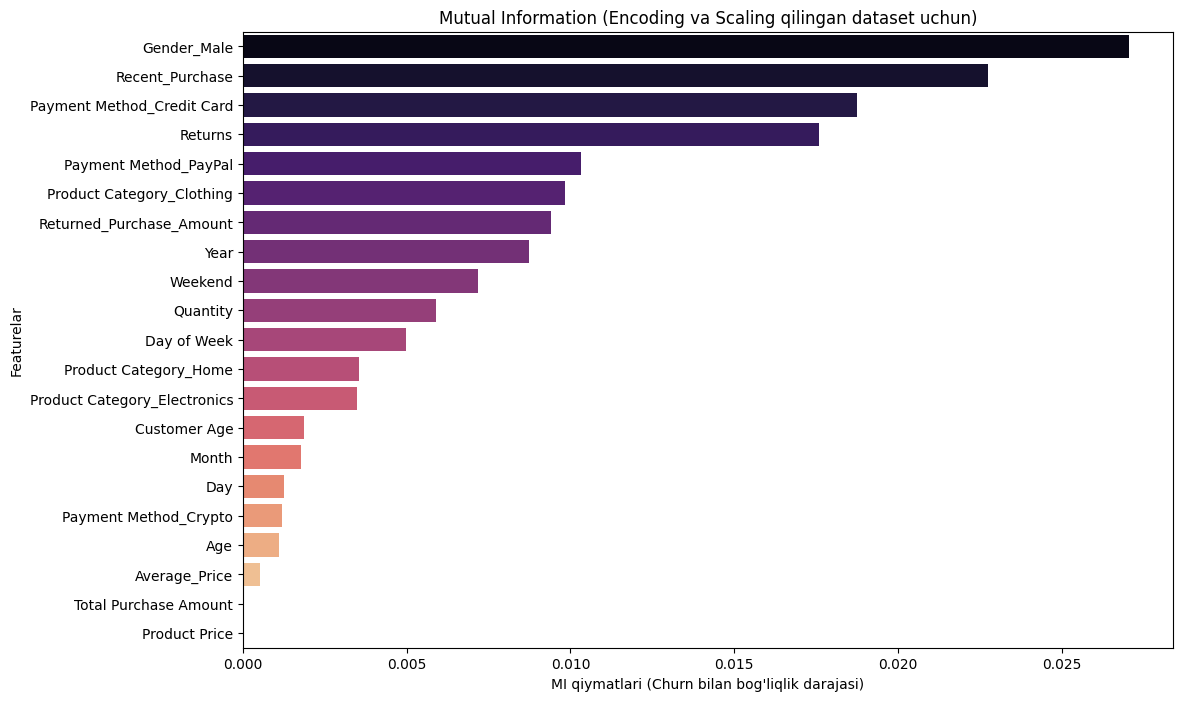

In [439]:
plt.figure(figsize=(12, 8))
sns.barplot(x=mi_scores.values, y=mi_scores.index, palette='magma')

plt.title("Mutual Information (Encoding va Scaling qilingan dataset uchun)")
plt.xlabel("MI qiymatlari (Churn bilan bog'liqlik darajasi)")
plt.ylabel("Featurelar")
plt.show()

### Feature Trnasformation

In [440]:
# skewness>0.5    -> right skewed (positive skewness)
# skewness<-0.5   -> left skewed (negative skewness)
# skewness between -0.5 and 0.5 -> normally distributed (zero skewness)


In [441]:
df_encoded.skew().sort_values(ascending=False)


Payment Method_Crypto           2.682851
Average_Price                   1.678703
Product Category_Home           1.504673
Churn                           1.503952
Product Category_Electronics    1.494240
Returned_Purchase_Amount        1.183840
Weekend                         0.958295
Payment Method_PayPal           0.876268
Product Category_Clothing       0.871796
Payment Method_Credit Card      0.399994
Returns                         0.395195
Recent_Purchase                 0.162842
Year                            0.121480
Month                           0.106841
Day                             0.025585
Gender_Male                     0.008960
Customer Age                    0.003668
Age                             0.003668
Day of Week                     0.002361
Product Price                   0.001450
Quantity                        0.000714
Total Purchase Amount           0.000352
dtype: float64

In [442]:


# Skewness qiymatlarini olish
skew_values = df_encoded.skew().sort_values(ascending=False)

C:\Users\Maftuna\AppData\Local\Temp\ipykernel_19936\3048659224.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skew_values.values, y=skew_values.index, palette='coolwarm')


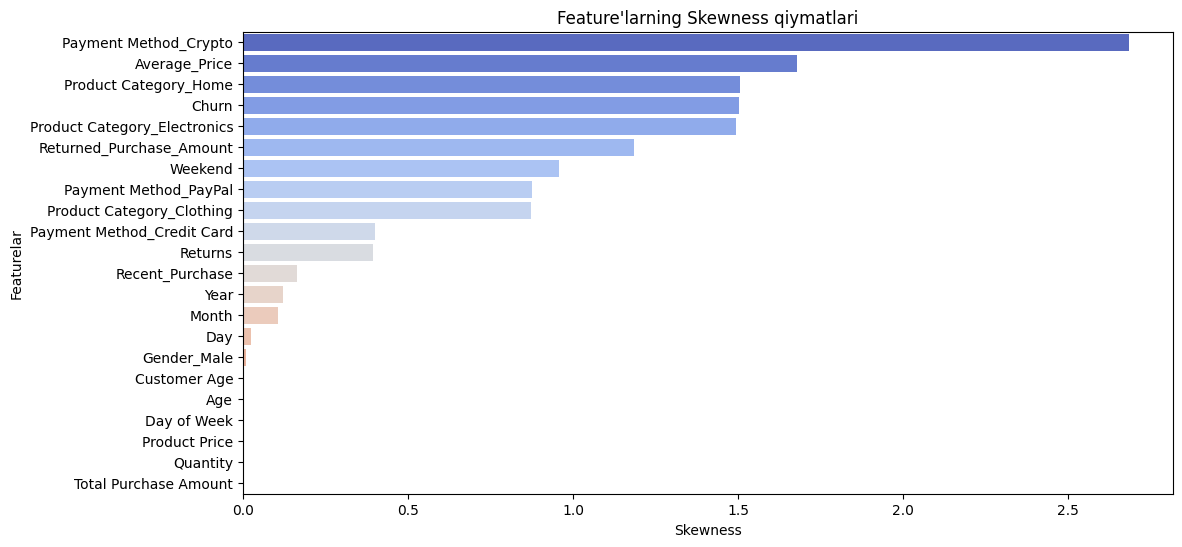

In [443]:


# Grafik chizish
plt.figure(figsize=(12, 6))
sns.barplot(x=skew_values.values, y=skew_values.index, palette='coolwarm')

plt.title("Feature'larning Skewness qiymatlari")
plt.xlabel("Skewness")
plt.ylabel("Featurelar")
plt.show()


In [444]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Product Price                 250000 non-null  float64
 1   Quantity                      250000 non-null  float64
 2   Total Purchase Amount         250000 non-null  float64
 3   Customer Age                  250000 non-null  float64
 4   Returns                       250000 non-null  float64
 5   Age                           250000 non-null  float64
 6   Churn                         250000 non-null  int64  
 7   Year                          250000 non-null  float64
 8   Month                         250000 non-null  float64
 9   Day                           250000 non-null  float64
 10  Day of Week                   250000 non-null  float64
 11  Product Category_Clothing     250000 non-null  float64
 12  Product Category_Electronics  250000 non-nul

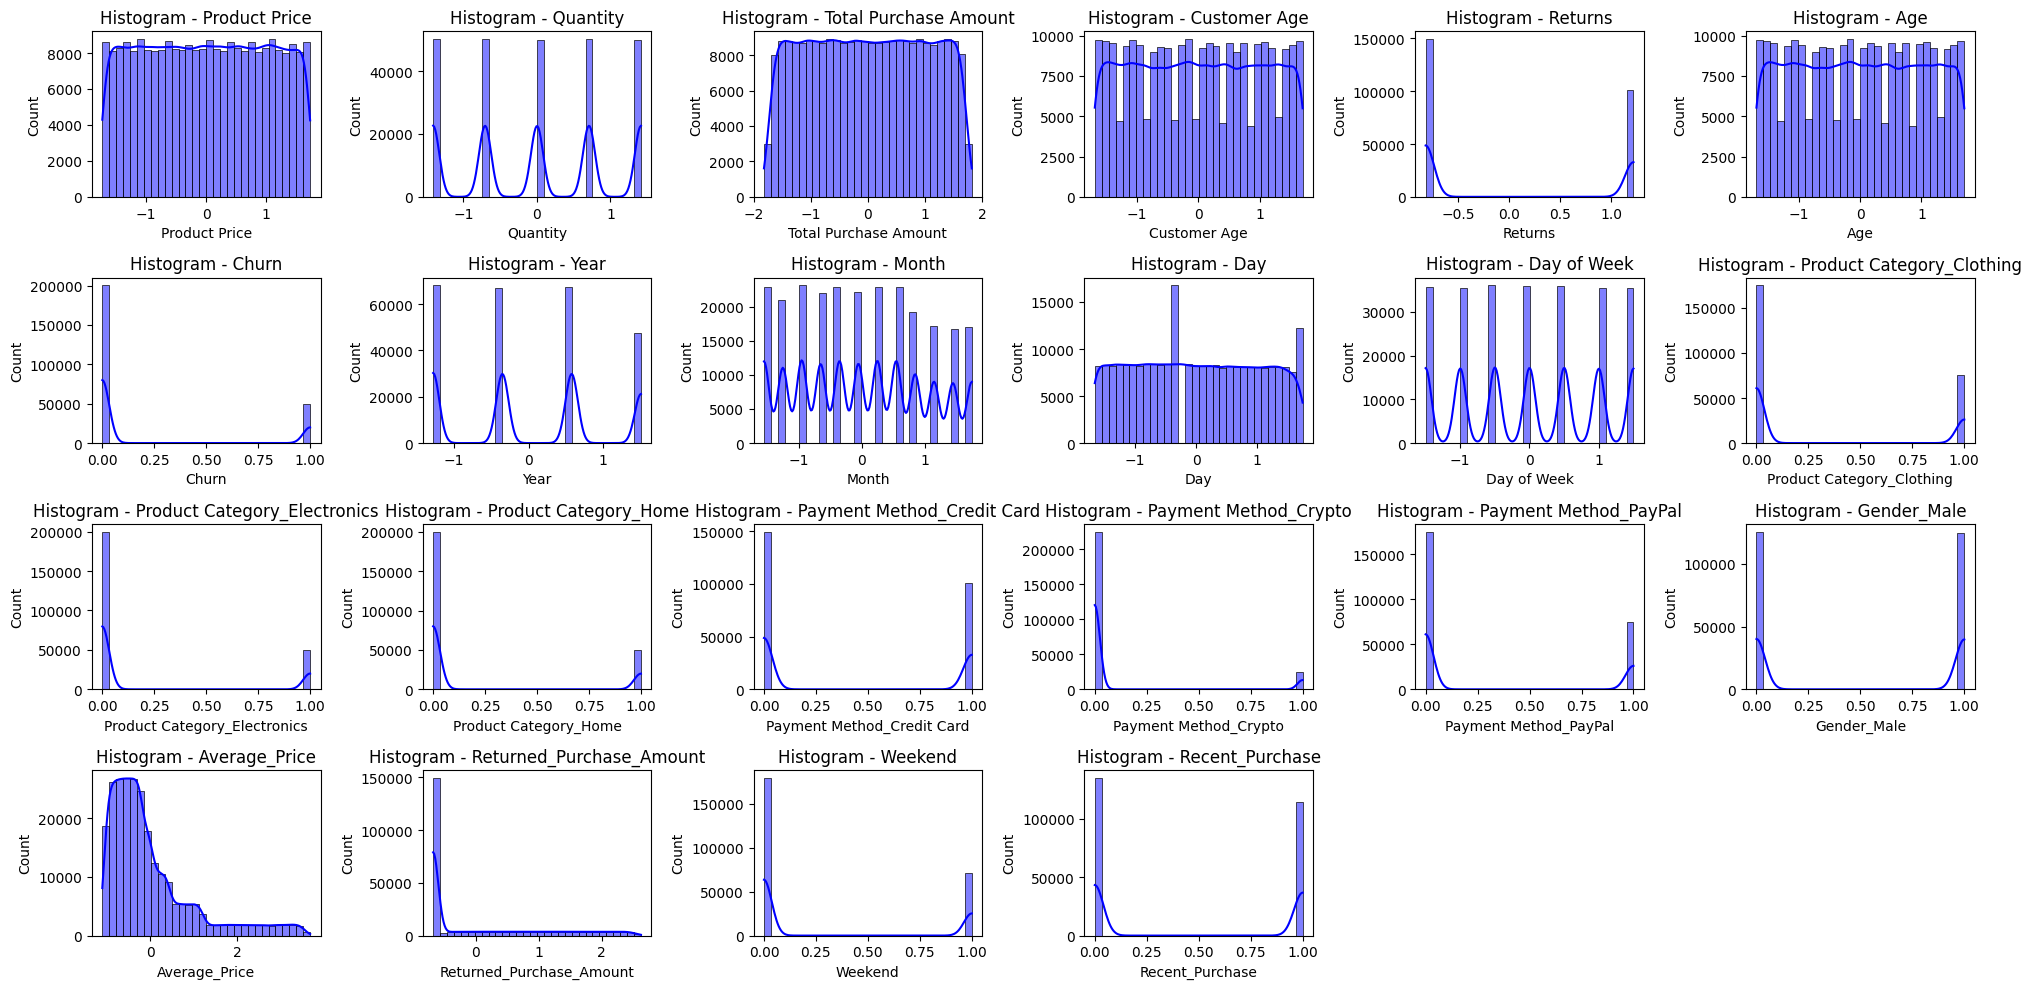

In [445]:

# Faqat sonli ustunlarni tanlab olish
num_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Grafik chizish
plt.figure(figsize=(20, 10))

for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 6, i)  # 4 qator, 6 ustunli grid
    sns.histplot(df_encoded[col], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f"Histogram - {col}")

plt.tight_layout()
plt.show()



In [446]:
# Skewnessni hisoblash
skewness = df_encoded.skew()

# Qiyshaygan ustunlarni aniqlash (|skewness| > 0.5 bo'lganlar)
skewed_features_positive = skewness[abs(skewness) > 0.5].index.to_list()

skewed_features_negative = skewness[abs(skewness) < -0.5].index.to_list()


print("Qiyshaygan ustunlar:", skewed_features_positive)
print("Qiyshaygan ustunlar:", skewed_features_negative)



Qiyshaygan ustunlar: ['Churn', 'Product Category_Clothing', 'Product Category_Electronics', 'Product Category_Home', 'Payment Method_Crypto', 'Payment Method_PayPal', 'Average_Price', 'Returned_Purchase_Amount', 'Weekend']
Qiyshaygan ustunlar: []


## MI va Skewness past featurlar 

In [447]:
df_encoded = df_encoded.drop(['Product Price', 'Total Purchase Amount', 'Age', 'Payment Method_Crypto', 'Day'], axis=1)


In [448]:
print(df_encoded.columns)  # Barcha ustunlarni ko‘rish


Index(['Quantity', 'Customer Age', 'Returns', 'Churn', 'Year', 'Month',
       'Day of Week', 'Product Category_Clothing',
       'Product Category_Electronics', 'Product Category_Home',
       'Payment Method_Credit Card', 'Payment Method_PayPal', 'Gender_Male',
       'Average_Price', 'Returned_Purchase_Amount', 'Weekend',
       'Recent_Purchase'],
      dtype='object')


In [449]:
df_encoded['log_Average_Price'] = np.log1p(df_encoded['Average_Price'])
df_encoded['log_Returned_Purchase_Amount'] = np.log1p(df_encoded['Returned_Purchase_Amount'])


c:\Users\Maftuna\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [450]:
# Asl ustunlarni tushirish (chunki log versiyasi bor)d
df_encoded.drop(['Average_Price', 'Returned_Purchase_Amount'], axis=1, inplace=True)

In [451]:
df_encoded.head(5)

,Quantity,Customer Age,Returns,Churn,Year,Month,Day of Week,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Payment Method_Credit Card,Payment Method_PayPal,Gender_Male,Weekend,Recent_Purchase,log_Average_Price,log_Returned_Purchase_Amount
0,0.000780,-0.452145,-0.821739,0,-1.278899,0.838950,-0.999665,0.0,1.0,0.0,1.0,0.0,1.0,0,0,-2.273810,-1.13377
1,0.707648,-0.452145,-0.821739,0,0.577279,-0.950102,1.003322,0.0,0.0,1.0,0.0,1.0,1.0,1,1,-0.700649,-1.13377
2,-0.706088,-0.452145,-0.821739,0,0.577279,-0.353752,-1.500412,0.0,0.0,1.0,0.0,1.0,1.0,0,1,0.274784,-1.13377
3,-1.412956,-0.452145,-0.821739,0,-1.278899,1.435301,0.001829,1.0,0.0,0.0,0.0,1.0,1.0,0,0,1.109250,-1.13377
4,-1.412956,0.329603,-0.821739,1,-1.278899,1.435301,0.502575,0.0,0.0,1.0,1.0,0.0,0.0,0,0,1.092227,-1.13377


In [452]:
mi = mutual_info_classif(X, y, random_state=42)
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_scores)

Gender_Male                     0.027047
Recent_Purchase                 0.022743
Payment Method_Credit Card      0.018766
Returns                         0.017606
Payment Method_PayPal           0.010310
Product Category_Clothing       0.009840
Returned_Purchase_Amount        0.009420
Year                            0.008746
Weekend                         0.007181
Quantity                        0.005905
Day of Week                     0.004968
Product Category_Home           0.003534
Product Category_Electronics    0.003498
Customer Age                    0.001855
Month                           0.001787
Day                             0.001252
Payment Method_Crypto           0.001183
Age                             0.001112
Average_Price                   0.000531
Total Purchase Amount           0.000000
Product Price                   0.000000
dtype: float64


C:\Users\Maftuna\AppData\Local\Temp\ipykernel_19936\403745406.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_scores.values, y=mi_scores.index, palette='magma')


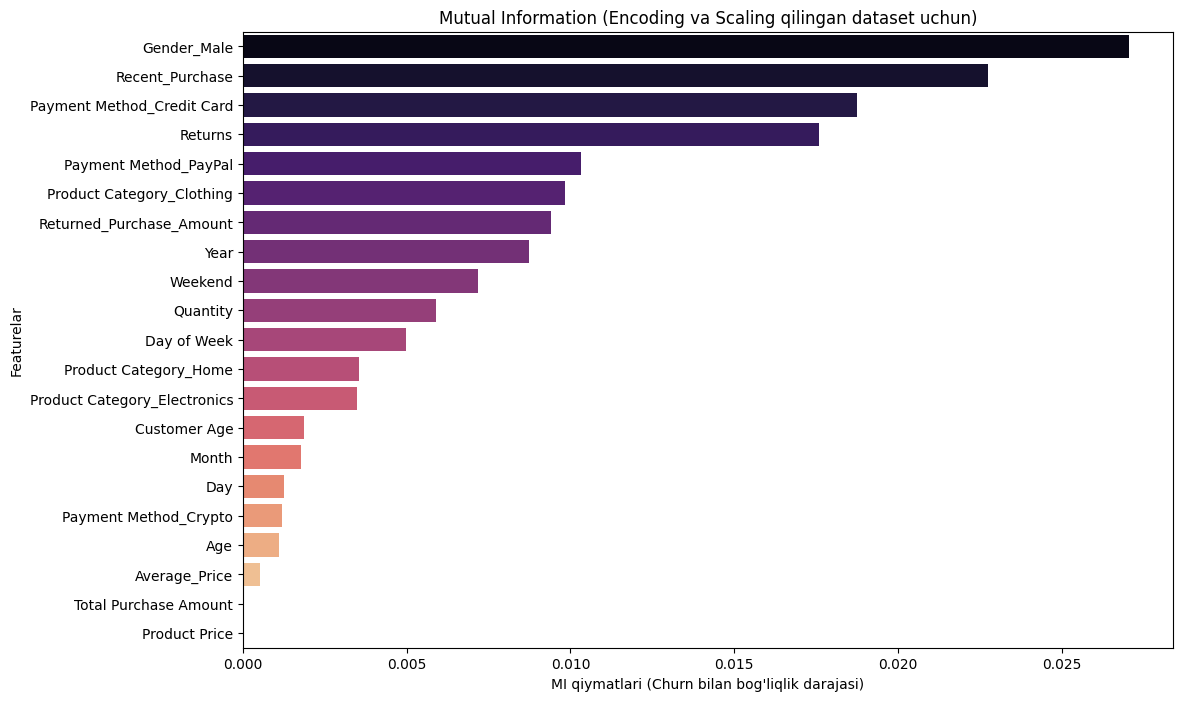

In [453]:
plt.figure(figsize=(12, 8))
sns.barplot(x=mi_scores.values, y=mi_scores.index, palette='magma')

plt.title("Mutual Information (Encoding va Scaling qilingan dataset uchun)")
plt.xlabel("MI qiymatlari (Churn bilan bog'liqlik darajasi)")
plt.ylabel("Featurelar")
plt.show()

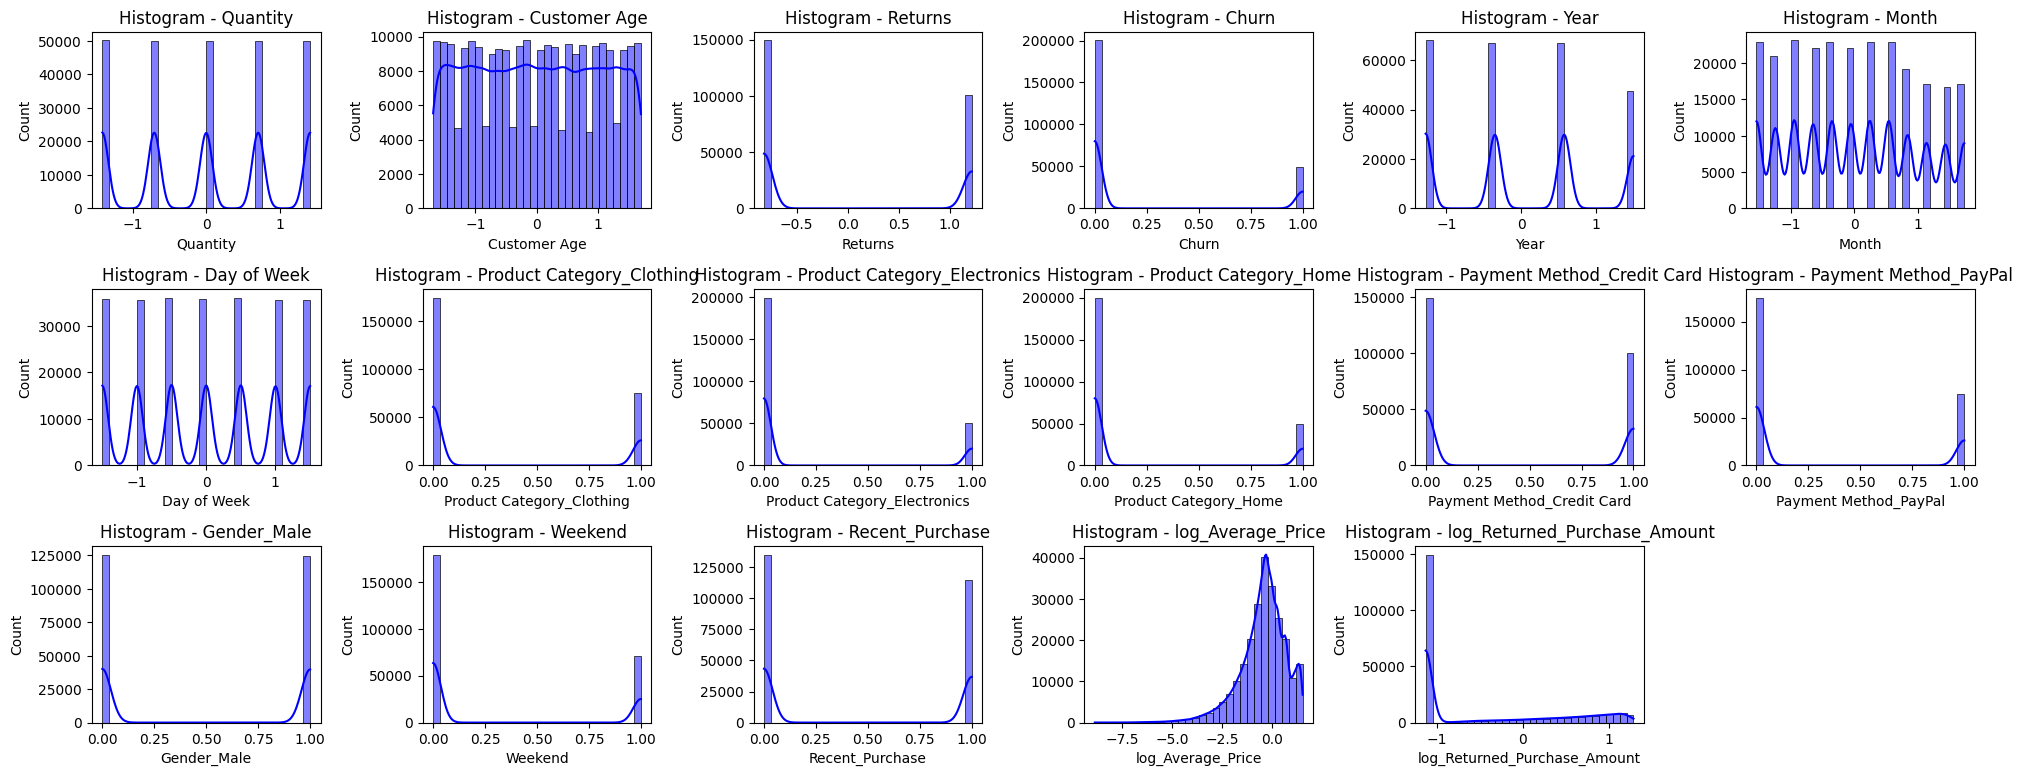

In [454]:
# Faqat sonli ustunlarni tanlab olish
num_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Grafik chizish
plt.figure(figsize=(20, 10))

for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 6, i)  # 4 qator, 6 ustunli grid
    sns.histplot(df_encoded[col], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f"Histogram - {col}")

plt.tight_layout()
plt.show()


In [455]:
df_encoded.isnull().sum()  

Quantity                           0
Customer Age                       0
Returns                            0
Churn                              0
Year                               0
Month                              0
Day of Week                        0
Product Category_Clothing          0
Product Category_Electronics       0
Product Category_Home              0
Payment Method_Credit Card         0
Payment Method_PayPal              0
Gender_Male                        0
Weekend                            0
Recent_Purchase                    0
log_Average_Price               9467
log_Returned_Purchase_Amount       0
dtype: int64